# FAIR Introduction Exercises

Before we start we import the python modules we will need to do these exercises, make the figure output directory if we need to and print out which version of fair we're using.

In [1]:
import numpy as np

# %matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = 16, 9
plt.style.use('seaborn-darkgrid')
font = {'weight' : 'normal',
          'size'   : 16}

plt.rc('font', **font)

from IPython import display
import time

from os import makedirs
from os.path import isdir
from os.path import join
outpath = './exercise-figures'
try: 
    makedirs(outpath)
except OSError:
    if not isdir(outpath):
        raise

import fair
print "You are using version {0} of fair".format(fair.__version__)

You are using version 1.0.1 of fair


## Exercise 1. Investigating the effect of a step change in atmospheric CO$_2$ concentrations on temperature

### Set up

Here we are going to look at the effect of changes in atmospheric CO$_2$ concentrations on global mean temperature. To start with we introduce the set up.

Here we provide the code to make a plot of atmospheric CO$_2$ concentrations and global mean temperature. You will notice that atmospheric CO$_2$ concentrations undergo an instantaneous change from their initial, pre-industrial, value to some other, perturbed value. You will also notice that global mean temperatures respond to this perturbation. 

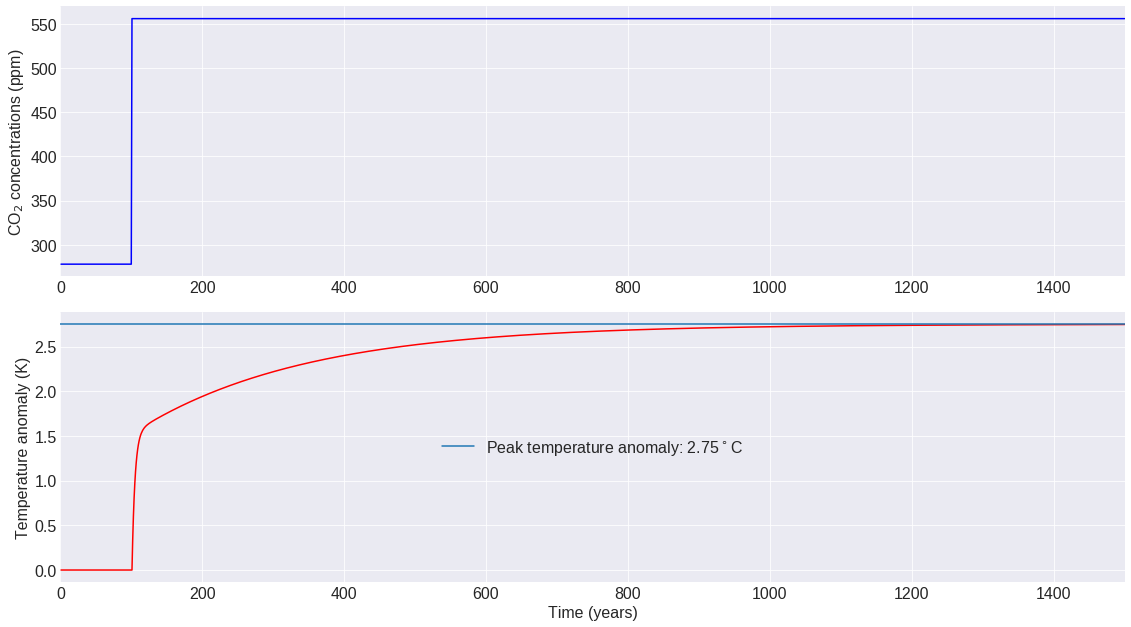

In [8]:
# set how much we would like to increase CO_2 concentrations by
co2_increase = 278.0
# set the total length of time in years
total_time = 1500
# set our pre-industrial concentration
C_0 = 278.0
# set the year in which we would like to increase CO_2 concentrations
dblt = 100

# here I define a function which sets our CO_2 concentrations array so we can
# use it later
def set_co2_concs(C_0,co2_increase):
    # set up an array to hold our CO_2 concentrations
    co2_concs = np.zeros(total_time)
    # set our pre industrial concentrations
    co2_concs[:dblt] = C_0
    # set our increased concentrations
    co2_concs[dblt:] = C_0 + co2_increase
    return co2_concs

# here I define a function to make the relevant plot for this exercise and
# return the peak temperature
def ex1_plot(co2_concs):
    # run FAIR
    C,T = fair.forward.fair_scm(co2_concs=co2_concs)
    # determine peak temperature
    T_peak = T[-1]

    # plot the output
    fig = plt.figure()
    concax = fig.add_subplot(211)
    tempax = fig.add_subplot(212)
    fig2 = plt.figure()
    junk = fig2.add_subplot(111)
    junk = fig2.add_subplot(111)
    plt.close()
    fig,emmsax,concax,forcax,tempax = fair.forward.plot_fair(0.0,
                                                             C,
                                                             0.0,
                                                             T,
                                                             infig=fig,
                                                             inemmsax = junk,
                                                             inconcax = concax,
                                                             inforcax = junk,
                                                             intempax = tempax,
                                                             tuts='years')
    tempax.plot([0,len(co2_concs)],
                [T_peak,T_peak],
                label='Peak temperature anomaly: {0:.3}$^\circ$C'.format(T_peak))
    concax.set_xlim([0,len(co2_concs)])
    tempax.set_xlim(concax.get_xlim())
    legend = tempax.legend(loc='center')
    return T_peak
    
    
# now we can set our co2_concs and make the plot
co2_concs = set_co2_concs(C_0,co2_increase)
ex1_plot(co2_concs)
display.display(plt.gcf()) 

### Your turn

Now you are going to see what effect changing the increased value of atmospheric CO_2 concentrations has on peak temperature. Change the value of `co2_increase` and see what happens to your plots and peak temperature. Try doubling, tripling and quadrupling CO_2 along with other values. Note: If you haven't run the cell above, this won't work.

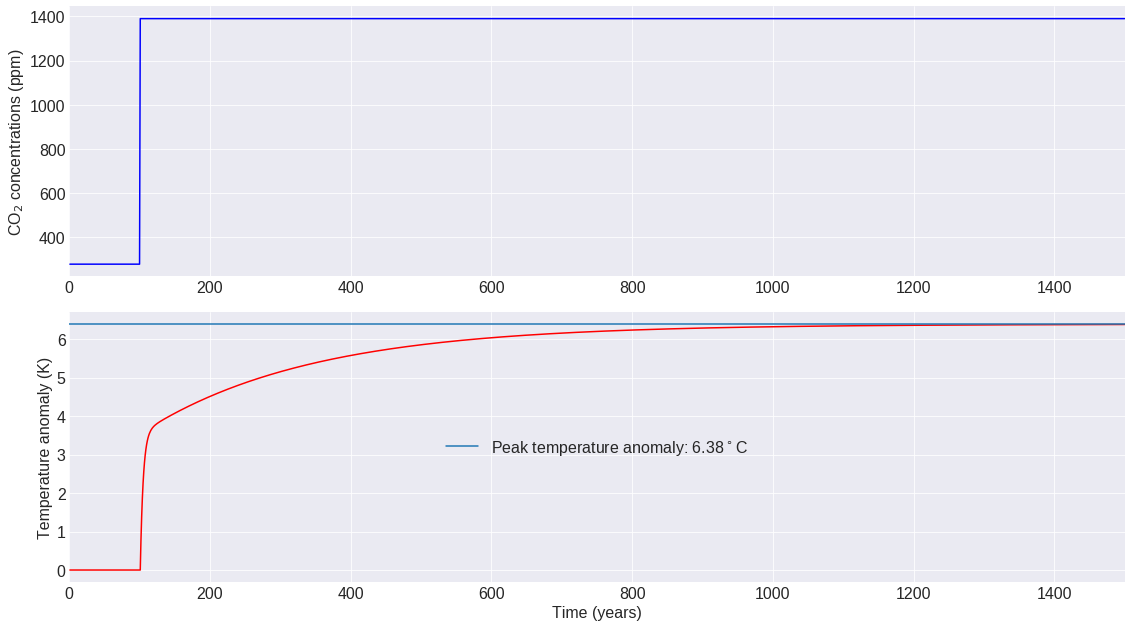

In [9]:
# set how much we would like to increase CO_2 concentrations by
co2_increase = 278*4

# make the plots
ex1_plot(set_co2_concs(C_0,co2_increase))
display.display(plt.gcf()) 

Finally, you are going to create a plot of peak temperature as a function of the increase in atmospheric CO_2 concentrations. Each time you enter a value for the increase in atmospheric CO_2 concentrations, a point will be added to the graph. Keep going until you get some sense of the relationship between these two variables.

To do the exercise, run the cell then enter `co2_increase` values until you are happy that you have a plot you like. The plot will be saved when you end as instructed by the prompt.

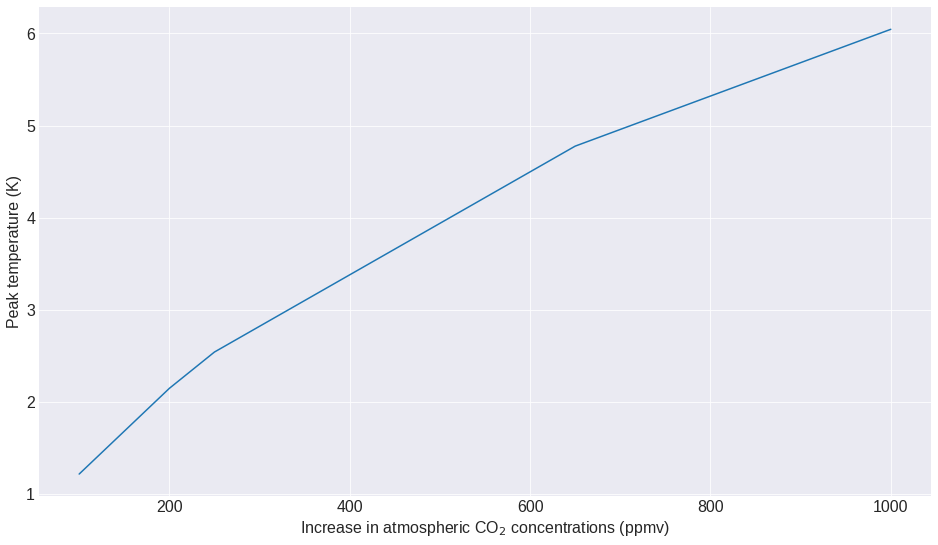

Enter "E" to end and save the figure, or anything else to continueE
figure saved as exercise-1-2017-07-05-16-24-24.png in ./exercise-figures


In [13]:
# set up lists which will hold our co2_increase and peak temperature values
co2_increases = []
peak_Ts = []
# define our 'end' variable
end = 'No'
# keep looping until we're done
while end != 'E':
    try:
        co2_increase = float(raw_input(r'Enter a value for the increase in atmospheric CO_2:'))
    except ValueError:
        print "That's not a number, try again"
        co2_increase = float(raw_input(r'Enter a value for the increase in atmospheric CO_2:'))
    # set up our figure too
    fig2 = plt.figure()
    iTax = fig2.add_subplot(111)
    iTax.set_ylabel('Peak temperature (K)')
    iTax.set_xlabel('Increase in atmospheric CO$_2$ concentrations (ppmv)')
    T_peak = ex1_plot(set_co2_concs(C_0,co2_increase))
    co2_increases.append(co2_increase)
    co2_increases.sort()
    peak_Ts.append(T_peak)
    peak_Ts.sort()
    iTax.plot(co2_increases,peak_Ts)
    display.clear_output(wait=True)
    display.display(fig2) 
    end = raw_input('Enter "E" to end and save the figure, or anything else to continue')
    
fn = 'exercise-1-{0}.png'.format(time.strftime("%Y-%m-%d-%H-%M-%S"))
fig2.savefig(join(outpath,fn),
             facecolor='silver',
             edgecolor='black',
             format='png',
             bbox_inches='tight',
             frameon=True)
print 'figure saved as {0} in {1}'.format(fn,outpath)

If you can't make head or tail of this, try entering the following values for the increase in atmospheric CO_2: 

0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000

You should end up with a figure like the following.

Here we have automated the process of determining the peak temperature for each value of the increase in atmospheric CO$_2$ concentrations.

In [ ]:
# set up lists which will hold our co2_increase and peak temperature values
co2_increases = np.linspace(0,1000,num=21)
peak_Ts = []

# loop over all co2_increase values
for co2_increase in co2_increases:
    # run FAIR
    C,T = fair.forward.fair_scm(co2_concs=set_co2_concs(C_0,co2_increase))
    # save peak temperature
    peak_Ts.append(T[-1])
    
    display.clear_output(wait=True)
    
    end = raw_input('Enter "E" to end and save the figure, or anything else to continue')

# set up our figure 
fig = plt.figure()
iTax = fig.add_subplot(111)
iTax.plot(co2_increases,peak_Ts)
iTax.set_ylabel('Peak temperature (K)')
iTax.set_xlabel('Increase in atmospheric CO$_2$ concentrations (ppmv)')
display.display(fig)
fn = 'exercise-1-{0}.png'.format(time.strftime("%Y-%m-%d-%H-%M-%S"))
fig2.savefig(join(outpath,fn),
             facecolor='silver',
             edgecolor='black',
             format='png',
             bbox_inches='tight',
             frameon=True)
print 'figure saved as {0} in {1}'.format(fn,outpath)